In [2]:
import pandas as pd

file_path = 'BankChurners.csv'
df = pd.read_csv(file_path)

df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


### Exploratory data analysis

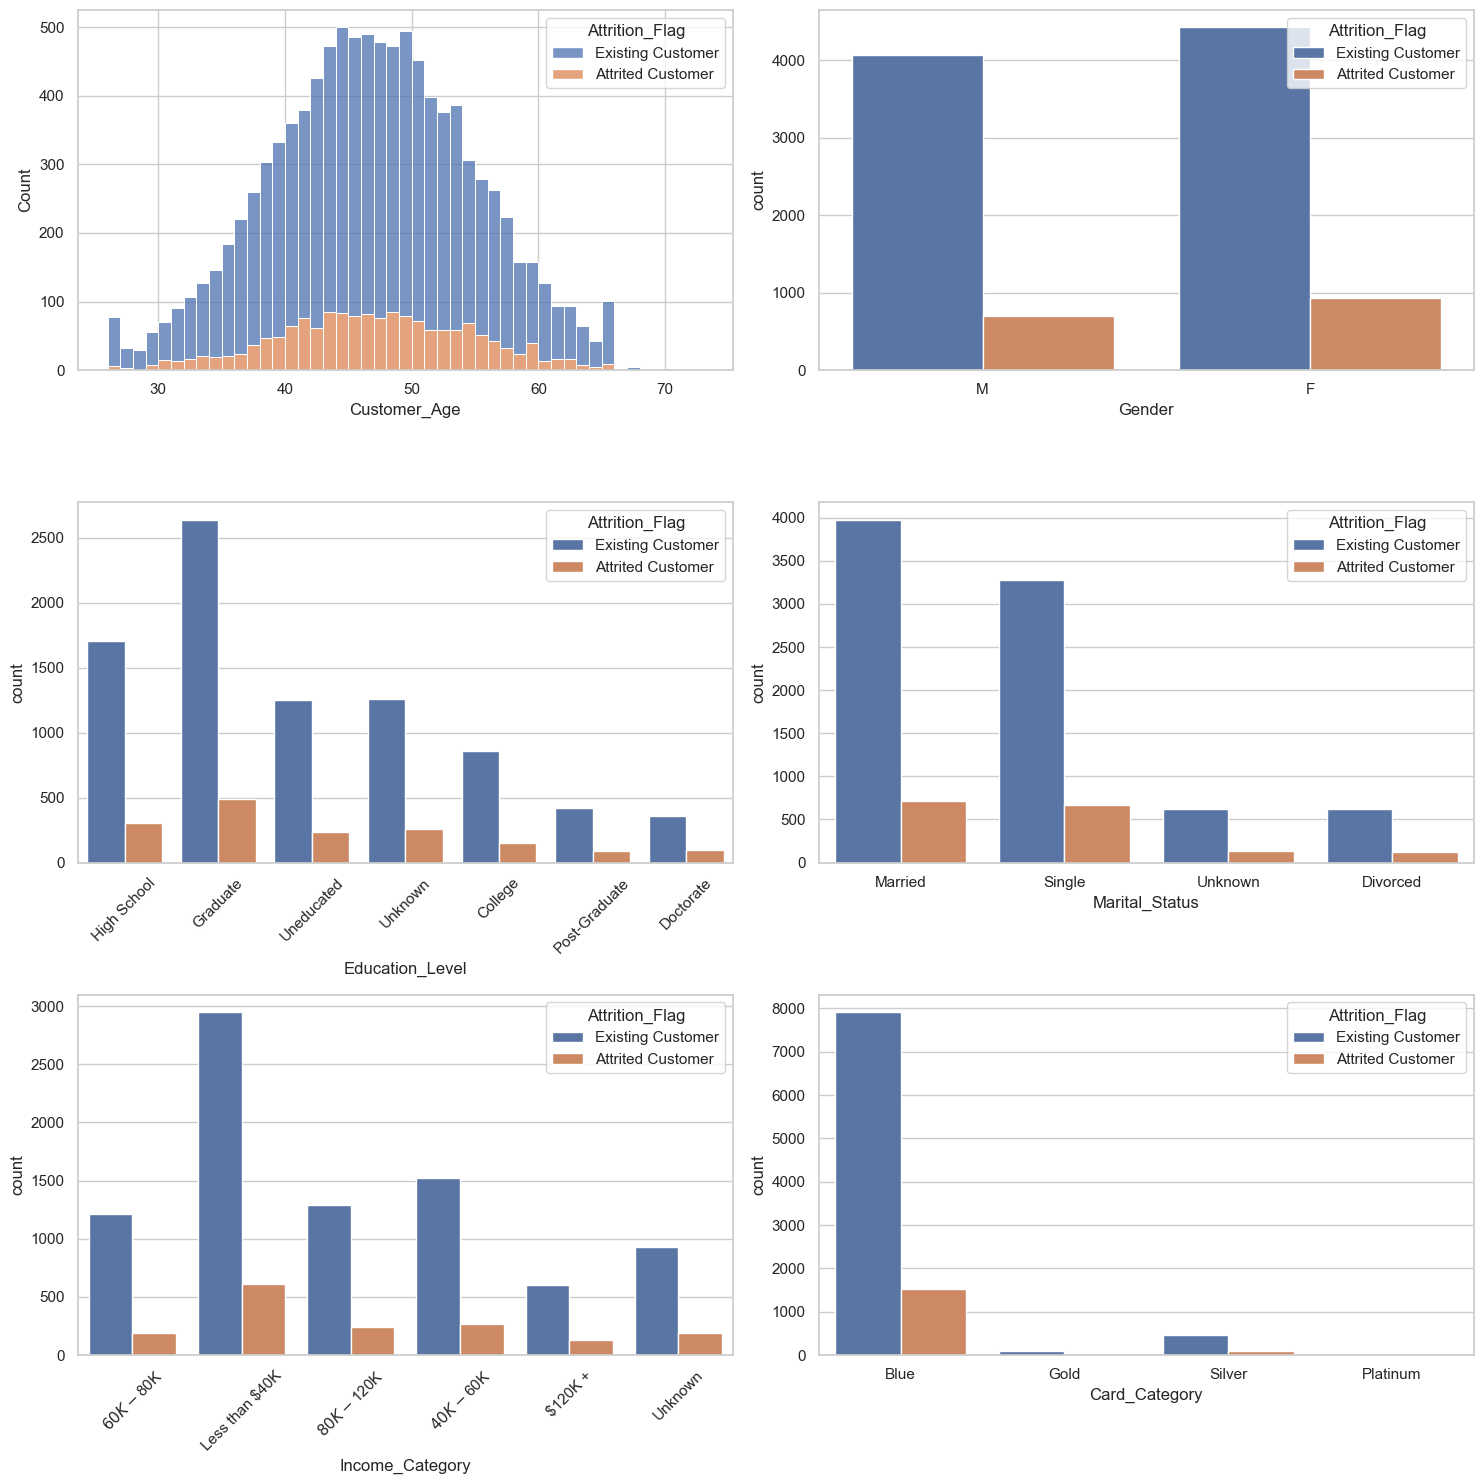

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, axes = plt.subplots(3, 2, figsize=(15, 15))

sns.histplot(df, x="Customer_Age", hue="Attrition_Flag", multiple="stack", ax=axes[0, 0])

sns.countplot(x="Gender", hue="Attrition_Flag", data=df, ax=axes[0, 1])

sns.countplot(x="Education_Level", hue="Attrition_Flag", data=df, ax=axes[1, 0])
plt.setp(axes[1, 0].get_xticklabels(), rotation=45)

sns.countplot(x="Marital_Status", hue="Attrition_Flag", data=df, ax=axes[1, 1])

sns.countplot(x="Income_Category", hue="Attrition_Flag", data=df, ax=axes[2, 0])
plt.setp(axes[2, 0].get_xticklabels(), rotation=45)

sns.countplot(x="Card_Category", hue="Attrition_Flag", data=df, ax=axes[2, 1])

plt.tight_layout()
plt.show()


### The analysis of banking behavior features in relation to customer attrition reveals 

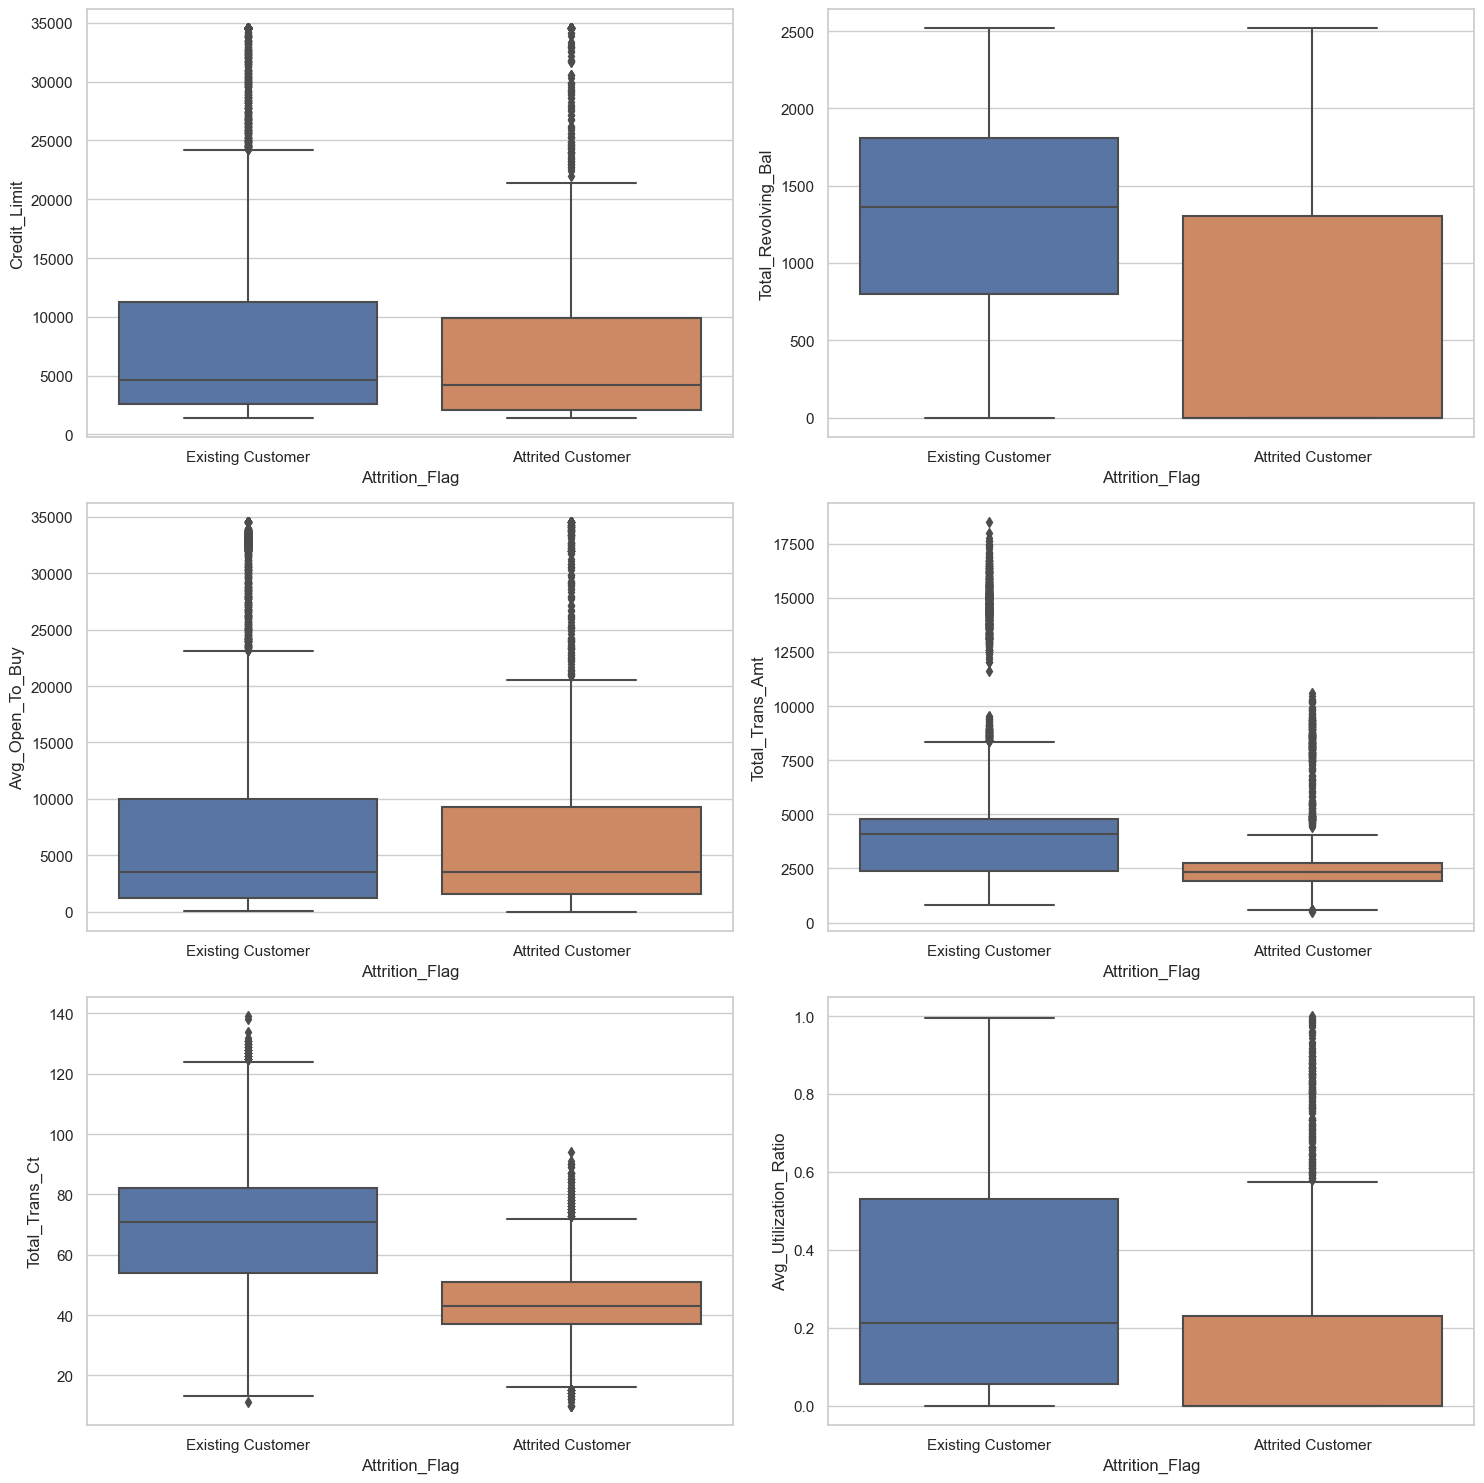

In [4]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

sns.boxplot(x="Attrition_Flag", y="Credit_Limit", data=df, ax=axes[0, 0])

sns.boxplot(x="Attrition_Flag", y="Total_Revolving_Bal", data=df, ax=axes[0, 1])

sns.boxplot(x="Attrition_Flag", y="Avg_Open_To_Buy", data=df, ax=axes[1, 0])

sns.boxplot(x="Attrition_Flag", y="Total_Trans_Amt", data=df, ax=axes[1, 1])

sns.boxplot(x="Attrition_Flag", y="Total_Trans_Ct", data=df, ax=axes[2, 0])

sns.boxplot(x="Attrition_Flag", y="Avg_Utilization_Ratio", data=df, ax=axes[2, 1])

plt.tight_layout()
plt.show()


### Outliers Analysis

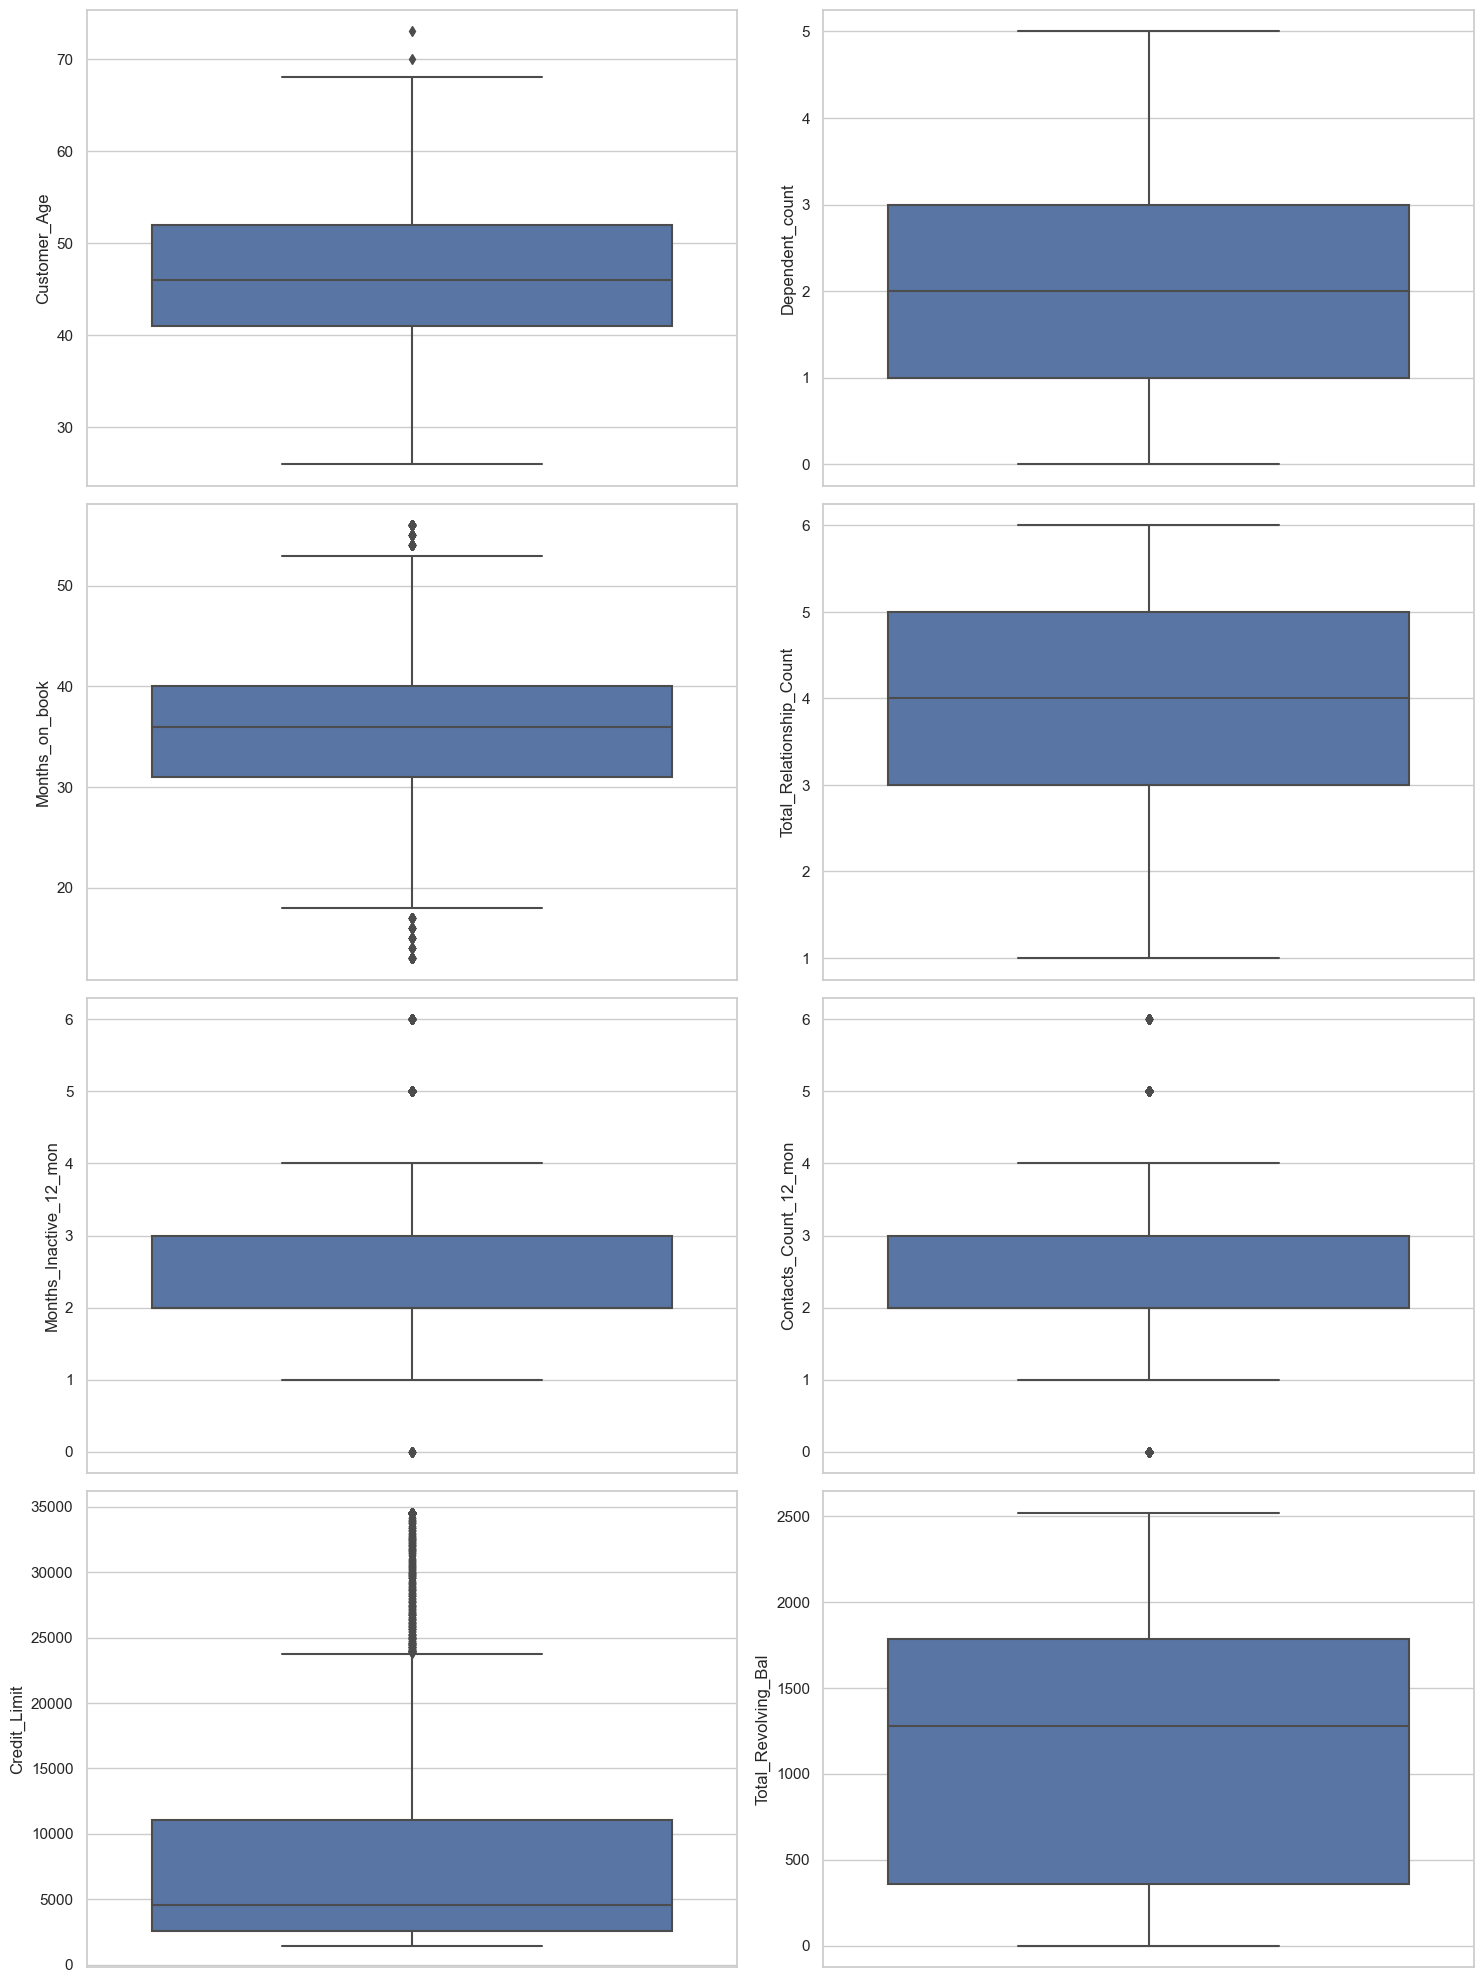

In [5]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

key_numeric_cols = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
                    'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal']

for i, col in enumerate(key_numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i//2, i%2])

plt.tight_layout()
plt.show()

### Predictive model

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

X = df.drop(['Attrition_Flag'], axis=1)
y = df['Attrition_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report

(1.0,
 array([[ 496,    0],
        [   0, 2543]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       496\n           1       1.00      1.00      1.00      2543\n\n    accuracy                           1.00      3039\n   macro avg       1.00      1.00      1.00      3039\nweighted avg       1.00      1.00      1.00      3039\n')

Given the unusually perfect performance metrics, it's likely that the model has overfitted to the training data. This can happen due to a variety of reasons such as:

1. The dataset might contain features that directly indicate the target variable.
2. The model is too complex for the dataset.
3. Lack of sufficient variation or representative data in the dataset.

### Revisiting the dataset to check for any data leakage

In [8]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix["Attrition_Flag"].sort_values(ascending=False)

correlation_with_target

Attrition_Flag                                                                                                                        1.000000
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2    0.999989
Total_Trans_Ct                                                                                                                        0.371403
Total_Ct_Chng_Q4_Q1                                                                                                                   0.290054
Total_Revolving_Bal                                                                                                                   0.263053
Avg_Utilization_Ratio                                                                                                                 0.178410
Total_Trans_Amt                                                                                                                       0.168598

**The correlation analysis reveals a significant issue:** the columns Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1 
and Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2 
have an extremely high correlation (almost 1) with the target variable Attrition_Flag. This suggests data leakage, where these features are likely directly derived from or highly indicative of the target variable.

To address this, we should remove these columns from the dataset and then rebuild and re-evaluate the model.

In [9]:
# Removing the columns causing data leakage
columns_to_remove = ['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
                     'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2']
df_revised = df.drop(columns=columns_to_remove)

X_revised = df_revised.drop(['Attrition_Flag'], axis=1)
y_revised = df_revised['Attrition_Flag']

X_train_revised, X_test_revised, y_train_revised, y_test_revised = train_test_split(X_revised, y_revised, test_size=0.3, random_state=42)

rf_model_revised = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_revised.fit(X_train_revised, y_train_revised)

y_pred_revised = rf_model_revised.predict(X_test_revised)

accuracy_revised = accuracy_score(y_test_revised, y_pred_revised)
conf_matrix_revised = confusion_matrix(y_test_revised, y_pred_revised)
class_report_revised = classification_report(y_test_revised, y_pred_revised)

accuracy_revised, conf_matrix_revised, class_report_revised

(0.9588680487002303,
 array([[ 401,   95],
        [  30, 2513]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.93      0.81      0.87       496\n           1       0.96      0.99      0.98      2543\n\n    accuracy                           0.96      3039\n   macro avg       0.95      0.90      0.92      3039\nweighted avg       0.96      0.96      0.96      3039\n')

**These results suggest that the Random Forest model, with the revised dataset, is a strong candidate for predicting customer churn based on past transaction behavior and demographic information.** 

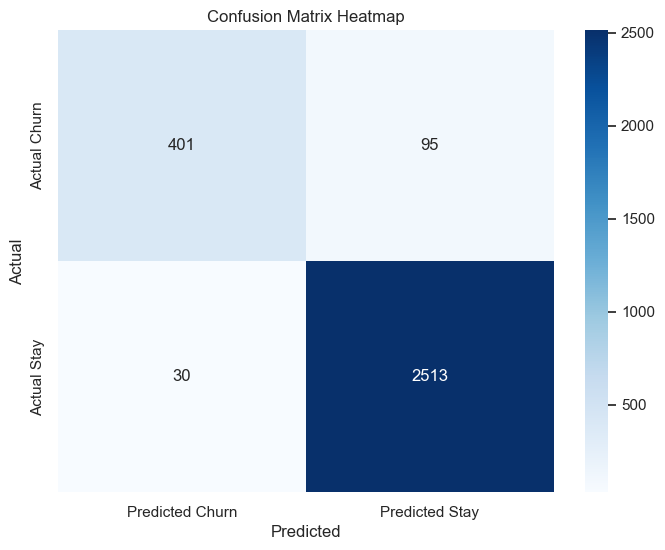

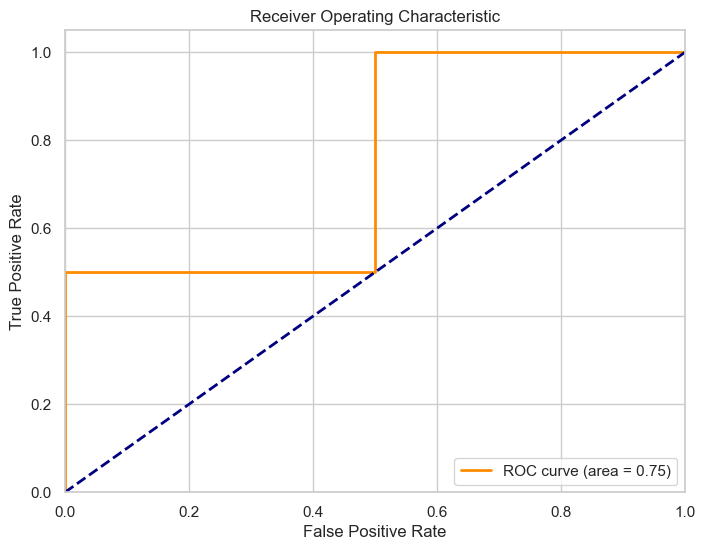

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

cm = np.array([[401, 95],
               [30, 2513]])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Churn", "Predicted Stay"],
            yticklabels=["Actual Churn", "Actual Stay"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()

y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [11]:
def detect_outliers(df):
    outlier_count = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_count[column] = outliers.shape[0]
    return outlier_count

# Find the count of outliers in the numerical columns
outlier_counts = detect_outliers(df)
outlier_counts


{'CLIENTNUM': 0,
 'Customer_Age': 2,
 'Dependent_count': 0,
 'Months_on_book': 386,
 'Total_Relationship_Count': 0,
 'Months_Inactive_12_mon': 331,
 'Contacts_Count_12_mon': 629,
 'Credit_Limit': 984,
 'Total_Revolving_Bal': 0,
 'Avg_Open_To_Buy': 963,
 'Total_Amt_Chng_Q4_Q1': 396,
 'Total_Trans_Amt': 896,
 'Total_Trans_Ct': 2,
 'Total_Ct_Chng_Q4_Q1': 394,
 'Avg_Utilization_Ratio': 0,
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1': 1691,
 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2': 1688}

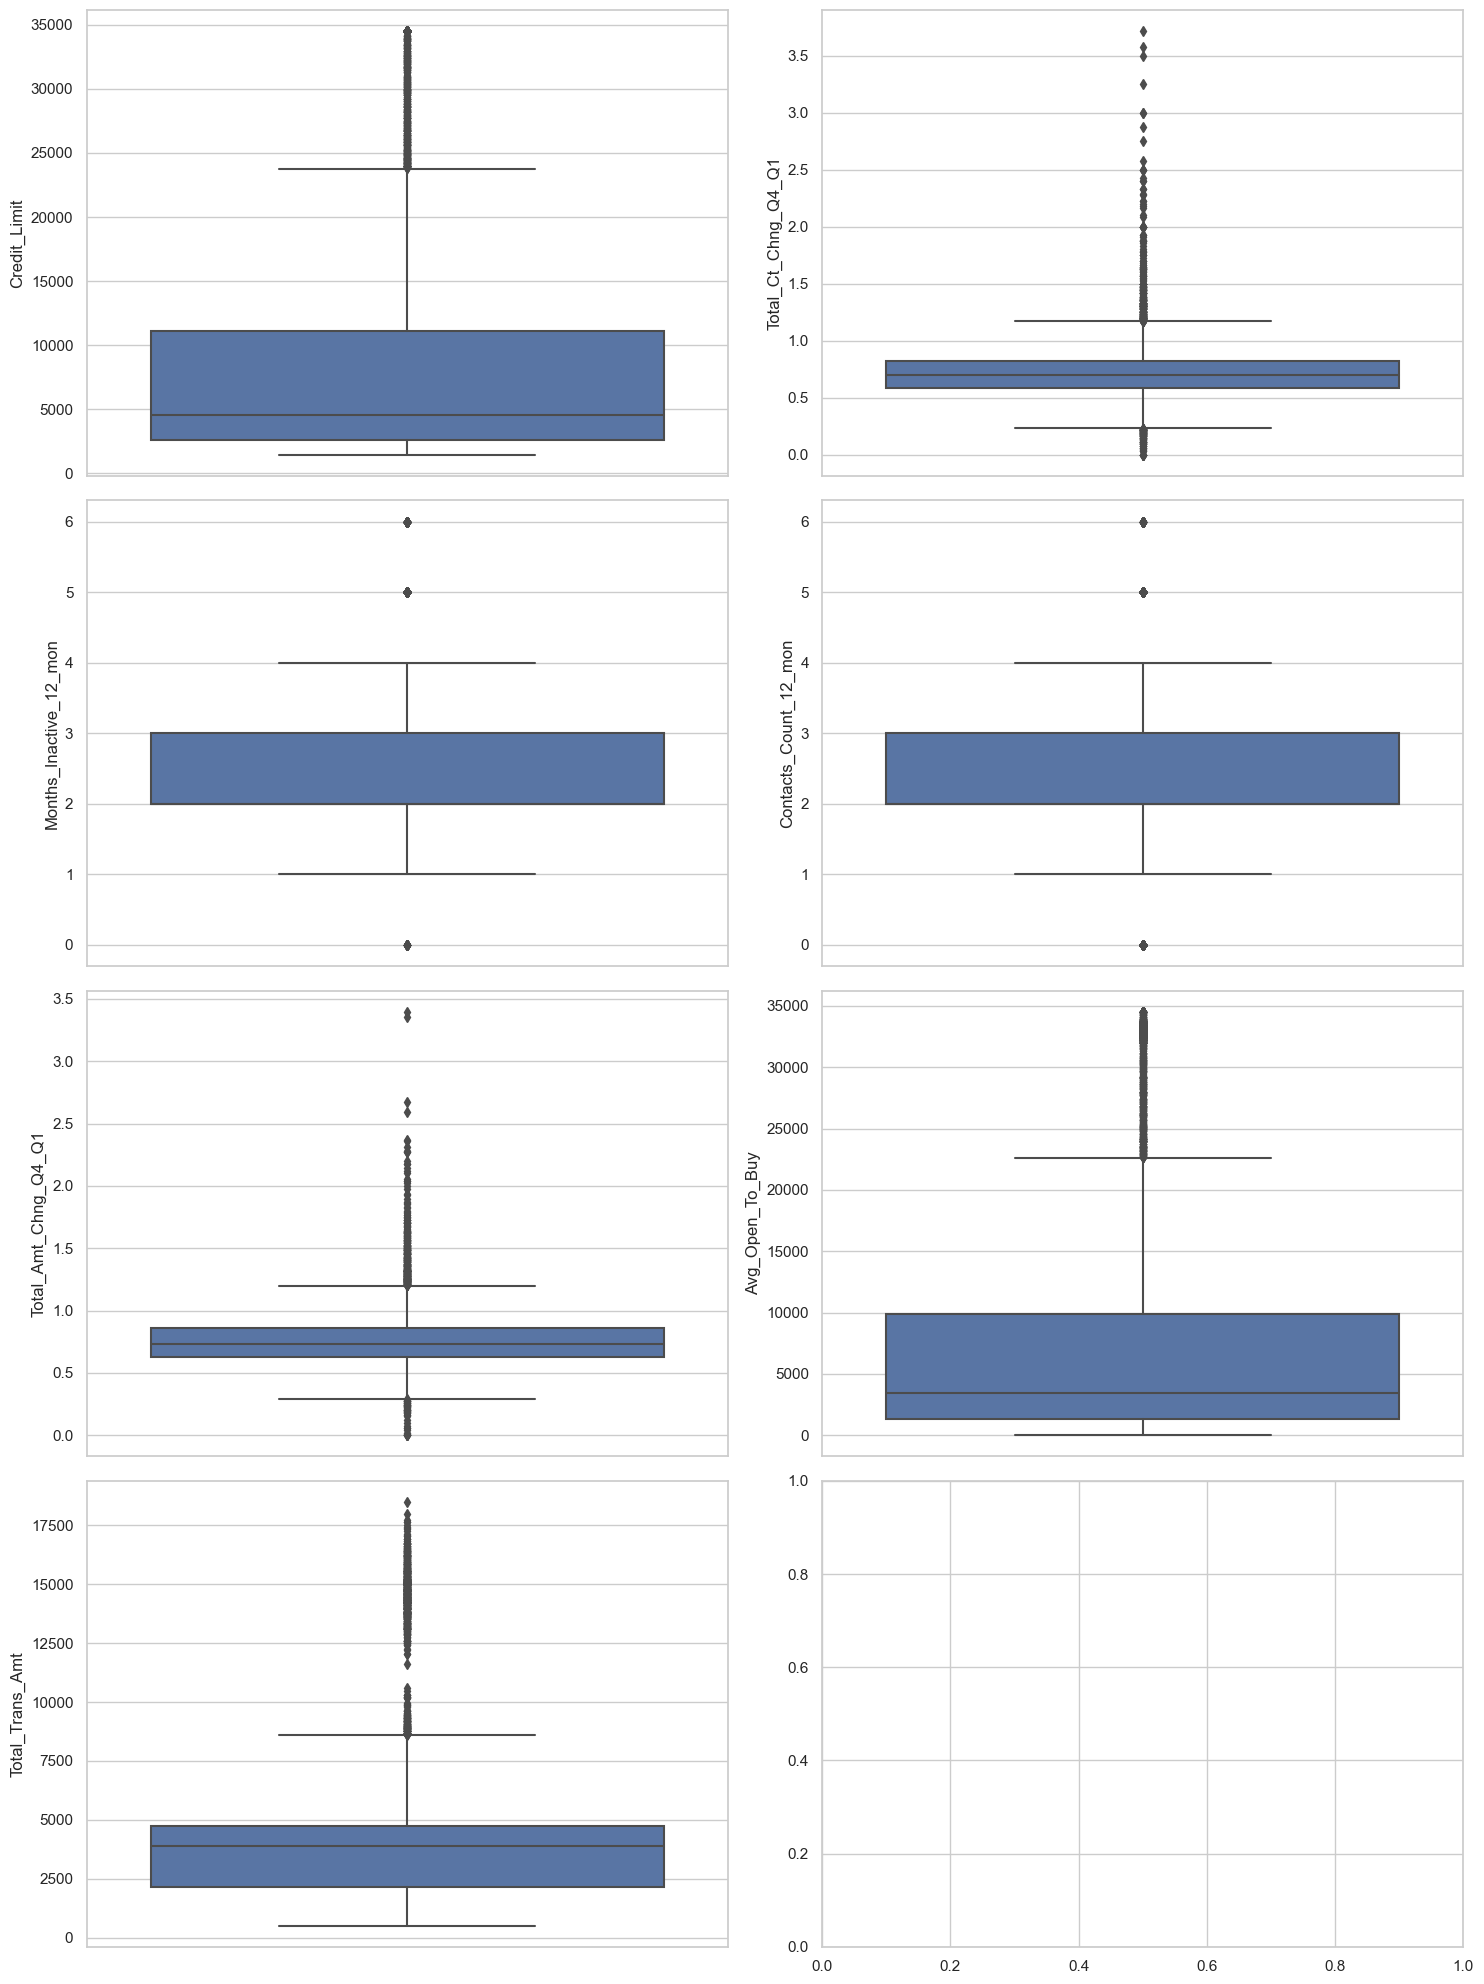

In [13]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20))

key_numeric_cols = ['Credit_Limit', 'Total_Ct_Chng_Q4_Q1', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 
                    'Total_Amt_Chng_Q4_Q1', 'Avg_Open_To_Buy', 'Total_Trans_Amt']

for i, col in enumerate(key_numeric_cols):
    sns.boxplot(y=df[col], ax=axes[i//2, i%2])

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Apply log transformation to the 'Credit_Limit' column
# Adding 1 to avoid log(0) which is undefined
data['Credit_Limit_Log'] = np.log(data['Credit_Limit'] + 1)

# Display the first few rows to verify the transformation
data[['Credit_Limit', 'Credit_Limit_Log']].head()




In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

X1_train, X1_test, y1_train, y1_test = train_test_split(
    set1_data.drop(target, axis=1), set1_data[target], test_size=0.2, random_state=42)

X2_train, X2_test, y2_train, y2_test = train_test_split(
    set2_data.drop(target, axis=1), set2_data[target], test_size=0.2, random_state=42)

model1 = RandomForestClassifier(random_state=42)
model2 = RandomForestClassifier(random_state=42)

model1.fit(X1_train, y1_train)
model2.fit(X2_train, y2_train)

y1_pred = model1.predict(X1_test)
y2_pred = model2.predict(X2_test)

metrics1 = {
    'Accuracy': accuracy_score(y1_test, y1_pred),
    'Precision': precision_score(y1_test, y1_pred),
    'Recall': recall_score(y1_test, y1_pred),
    'F1 Score': f1_score(y1_test, y1_pred),
    'ROC AUC Score': roc_auc_score(y1_test, y1_pred)
}

metrics2 = {
    'Accuracy': accuracy_score(y2_test, y2_pred),
    'Precision': precision_score(y2_test, y2_pred),
    'Recall': recall_score(y2_test, y2_pred),
    'F1 Score': f1_score(y2_test, y2_pred),
    'ROC AUC Score': roc_auc_score(y2_test, y2_pred)
}

metrics1, metrics2